In [16]:
import numpy as np

X=2*np.random.randn(100, 1)
y=4+3*X+np.random.randn(100, 1)

In [17]:
X_with_one = np.c_[np.ones((100,1)), X]

In [18]:
theta_hat=np.linalg.inv(X_with_one.T.dot(X_with_one)).dot(X_with_one.T).dot(y)

In [19]:
theta_hat

array([[4.07622425],
       [3.01198979]])

In [20]:
X_new = np.array([[0],[2]])
X_new_with_one =np.c_[np.ones((2,1)), X_new]
X_new_with_one

array([[1., 0.],
       [1., 2.]])

In [21]:
y_predict = theta_hat.T.dot(X_new_with_one.T)
y_predict

array([[ 4.07622425, 10.10020383]])

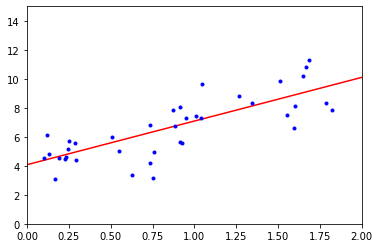

In [22]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict.T, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg =LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lin_reg.intercept_

array([4.07622425])

In [25]:
lin_reg.coef_

array([[3.01198979]])

In [26]:
theta_hat_lstsq, residuals, rank, s= np.linalg.lstsq(X_with_one, y, rcond=1e-6)

In [28]:
theta_hat_lstsq

array([[4.07622425],
       [3.01198979]])

In [29]:
np.linalg.pinv(X_with_one).dot(y)

array([[4.07622425],
       [3.01198979]])

In [33]:
learning_rate= 0.1
n_iteration = 1000
m = 100

theta=np.random.randn(2,1) #random initialization

for iteration in range(n_iteration):
    gradient_mse = 2/m * X_with_one.T.dot(np.dot(X_with_one,theta)-y)
    theta -= learning_rate*gradient_mse

In [58]:
theta

array([[4.09754254],
       [3.02312058]])

In [59]:
n_epochs = 50
t0=5
t1=50
def learning_schedule(t):
    return t0/(t+t1)

In [60]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi=X_with_one[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient= 2*xi.T.dot(xi.dot(theta)-yi)
        learning_rate = learning_schedule(epoch*m+i)
        theta-=learning_rate*gradient

In [61]:
theta

array([[4.12638626],
       [2.9974648 ]])

In [62]:
theta.ravel()

array([4.12638626, 2.9974648 ])

In [63]:
theta

array([[4.12638626],
       [2.9974648 ]])

In [65]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [66]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21461438]), array([3.07272698]))

In [67]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=1000, tol=1e-4, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [68]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14761444]), array([3.13527936]))

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=10000, tol=1e-7, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=1e-07, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [70]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11209061]), array([3.02632594]))

In [71]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=10000, tol=1e-7, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=1e-07, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [72]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11173796]), array([3.03906976]))